# Logistic Regression

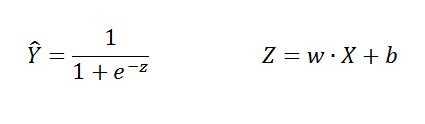

$\hat{Y}$: Predicted value  
**X**: Independent Variable  
**w**: Weight  
**b**: Bias

## Gradient Descent

$$w = w - \alpha \cdot dw$$
$$b = b - \alpha \cdot db$$

## Derivatives

$$  dw = \frac{1}{m} \cdot (\hat{Y} - Y) \cdot X   $$

$$  db = \frac{1}{m} \cdot (\hat{Y} - Y)   $$

**m**: Number of datapoints

In [1]:
import numpy as np

## Logistic regression model

In [26]:
class Logistic_Regression():
    
    # declaring learning rate and number of iterations (hyperparameters)
    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
    
    # fit function to adjust the model based on input
    def fit(self, X, Y):
        # m: number of rows (number of datapoints)
        # n: number of columns (number of input features)
        self.m, self.n = X.shape
        # initiation weight and bias values
        # Weights are a collection of values, one per feature so we create a matrix with the same number
        # of features than X
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        
        # implementing gradient descent
        for i in range(self.no_of_iterations):
            self.update_weights()
    
    def update_weights(self):
        # sigmoid function for Y_hat
        Y_hat = 1 / (1 + np.exp( - (self.X.dot(self.w) + self.b ) ))
        
        # derivatives
        dw = (1 / self.m) * np.dot(self.X.T, (Y_hat - self.Y))
        db = (1 / self.m) * np.sum(Y_hat - self.Y)
        
        # updating weight and bias using gradient descent
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db
    
    def predict(self, X):
        Y_pred = 1 / (1 + np.exp( - (X.dot(self.w) + self.b ) )) 
        Y_pred = np.where( Y_pred > 0.5, 1, 0)
        return Y_pred

## Implementation

In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [28]:
# Loading into pandas dataframe
diabetes_dataset = pd.read_csv('datasets/diabetes.csv')

In [29]:
# First 5 rows
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
# Number of rows and columns
diabetes_dataset.shape

(768, 9)

In [31]:
# Statistical measures
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [32]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non Diabetic  
1 --> Diabetic

In [33]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [34]:
# Separating data and labels
features = diabetes_dataset.drop(columns='Outcome', axis=1)
target = diabetes_dataset['Outcome']

In [35]:
print(features)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [36]:
print(target)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## Data standarization

In [37]:
scaler = StandardScaler()

In [38]:
scaler.fit(features)

StandardScaler()

In [39]:
standarized_data = scaler.transform(features)

## Train test split

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=2)

In [41]:
print(features.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


## Training the value

In [42]:
classifier = Logistic_Regression(learning_rate=0.01, no_of_iterations=1000)

In [43]:
# training
classifier.fit(X_train, Y_train)

## Model Evaluation

Accuracy Score

In [44]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [45]:
print(f'Training data accuracy: {training_data_accuracy}')

Training data accuracy: 0.6335504885993485


In [46]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [47]:
print(f'Test data accuracy: {test_data_accuracy}')

Test data accuracy: 0.7142857142857143


## Making a Predictive System

In [49]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[0]
The person is not diabetic


C:\Users\Luciano\Desktop\ML Course Siddhardhan\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
